I'll help you create a comparison of linear regression and MLP models for linear, quadratic, and sine functions. Here's the implementation:



In [1]:
!pip install numpy pandas matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 5.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [matplotlib]5 [matplotlib]n]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [34]:
# Generate data
x = np.linspace(-5, 5, 200).reshape(-1, 1)
y_linear = 2 * x + 1
y_quadratic = x ** 2 + 2 * x + 1
y_sine = np.sin(x)

# 노이즈 없이 이상적인 데이터만 사용
np.random.seed(42)
noise = np.random.normal(0, 0.1, x.shape)
data = {
    'Linear': y_linear + noise,
    'Quadratic': y_quadratic +noise,
    'Sine': y_sine + noise
}

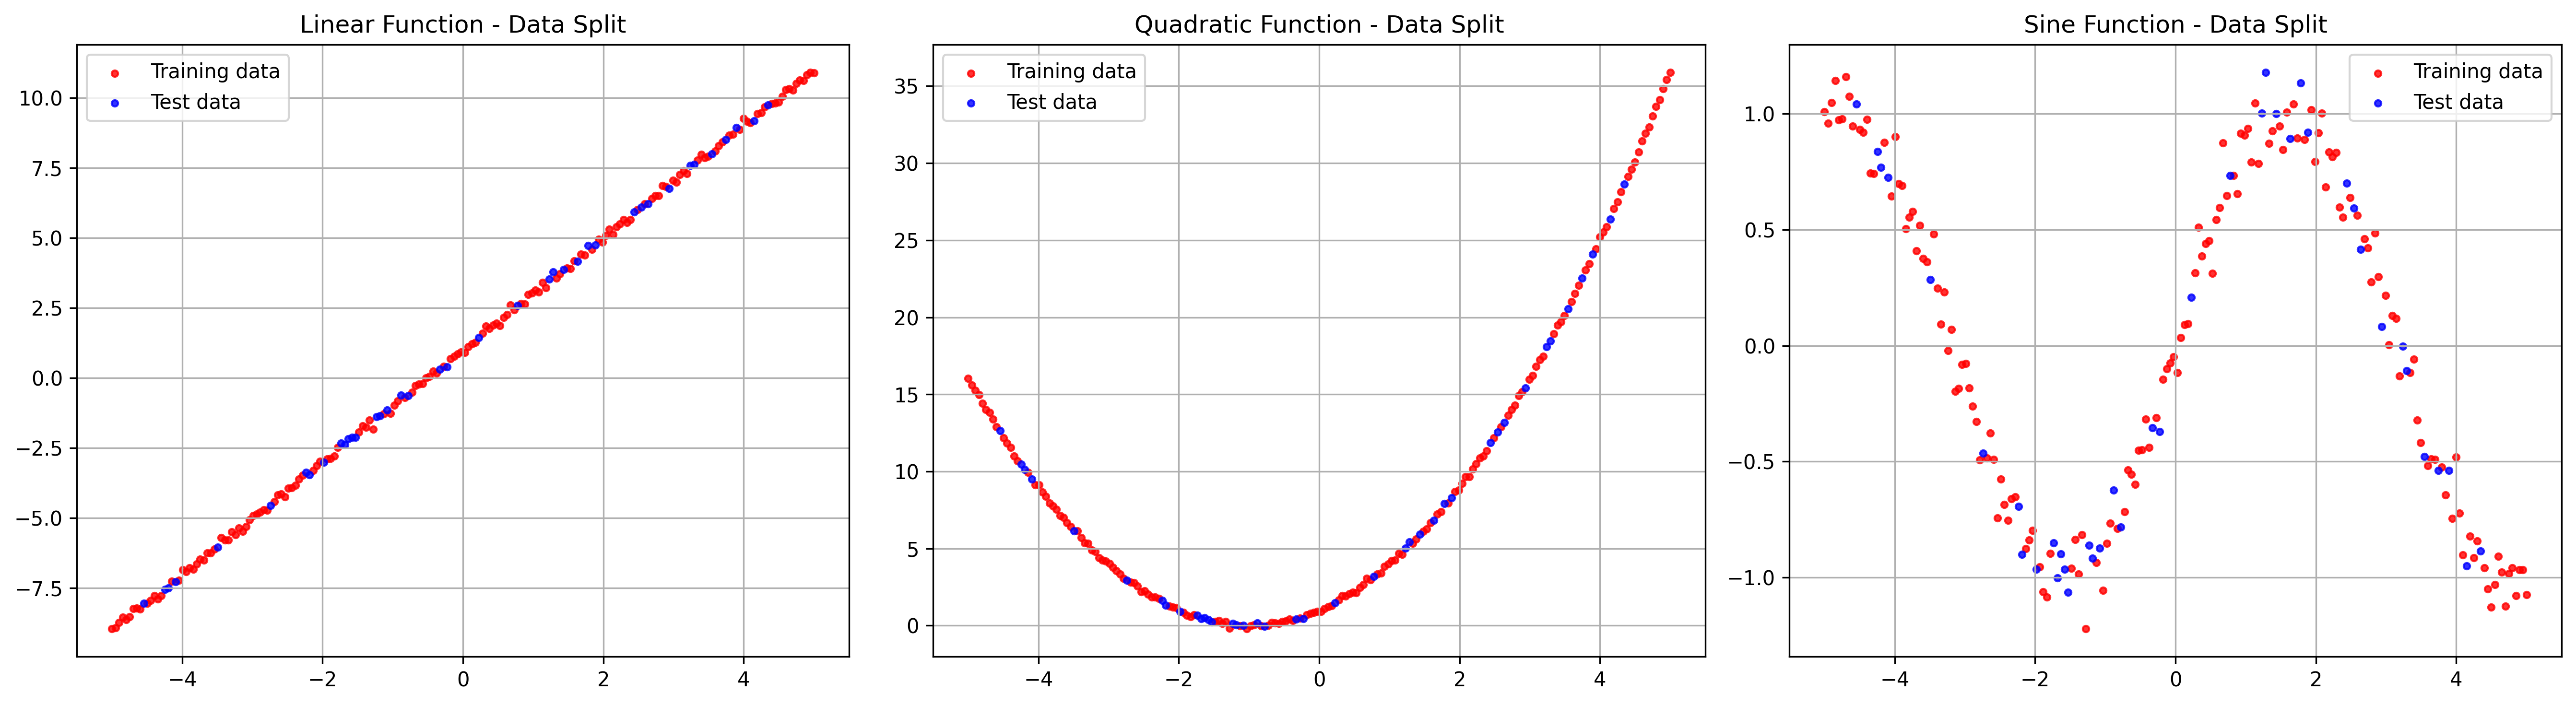

/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


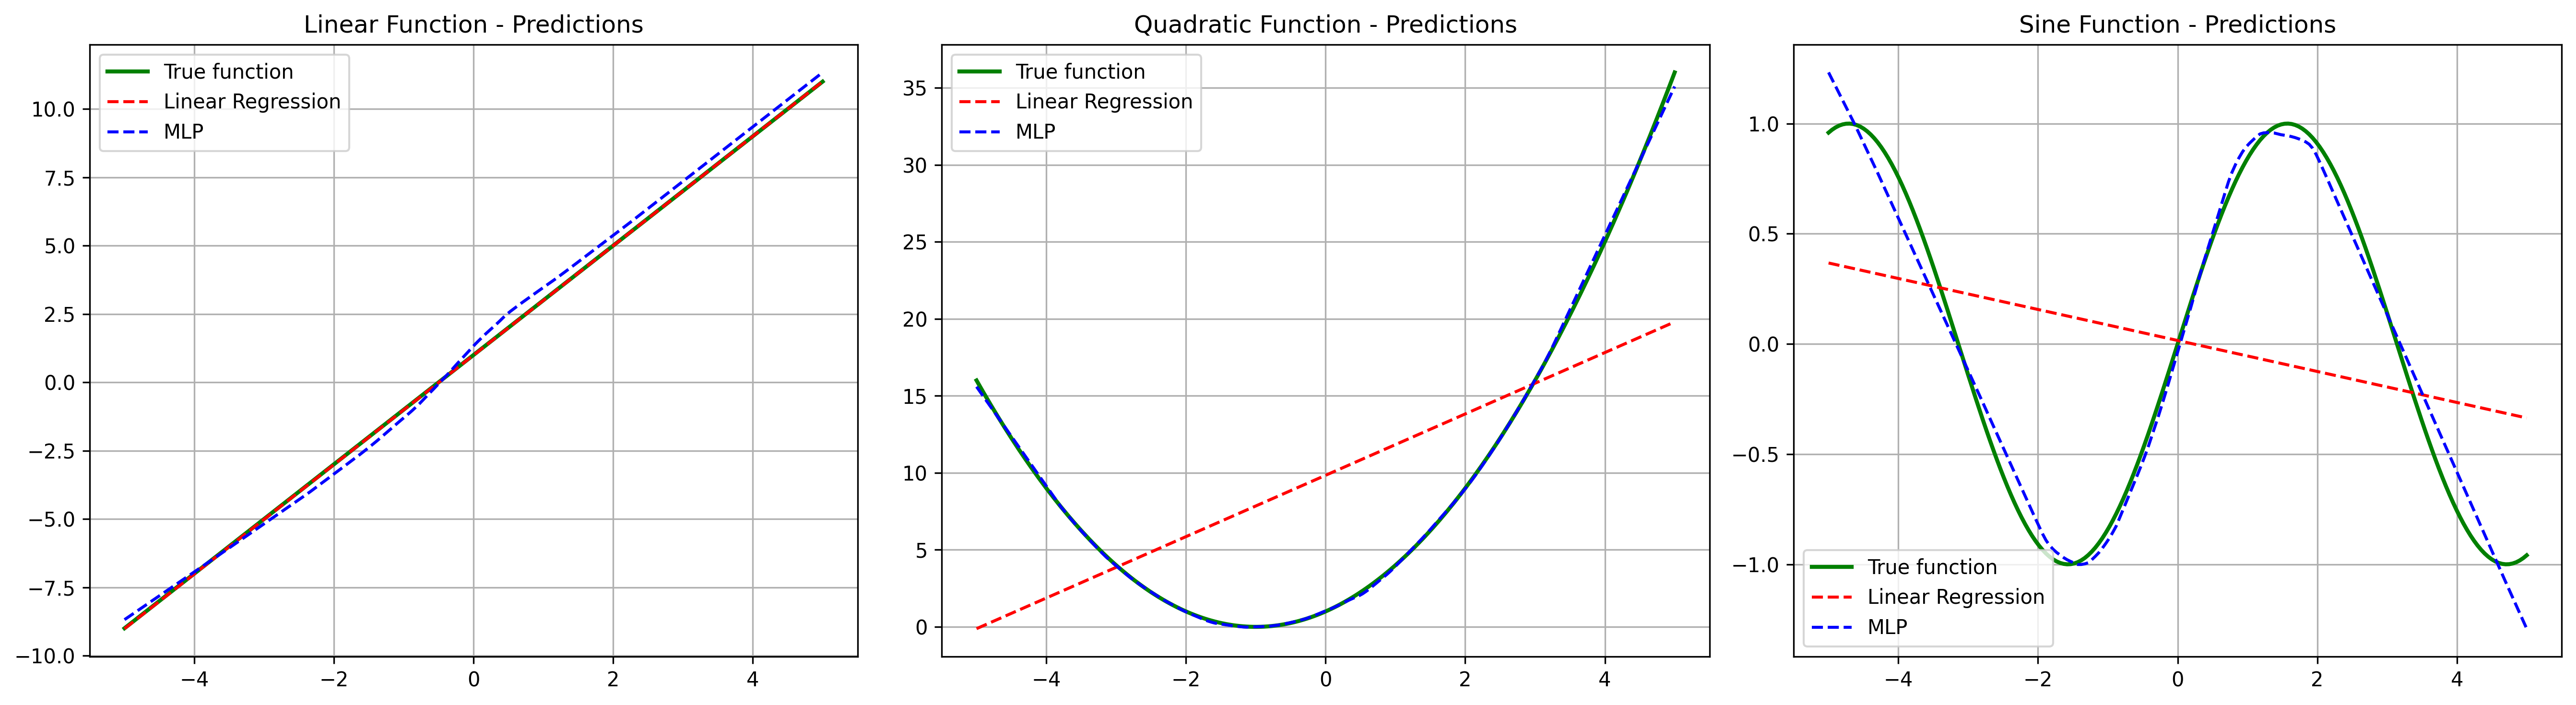

In [38]:
# Training models and plotting
# First set of plots - Training/Test Data
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5), dpi=300, facecolor='white')
for idx, (name, y) in enumerate(data.items()):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    ax = axes1[idx]
    if name == 'Linear':
        true_func = y_linear
    elif name == 'Quadratic':
        true_func = y_quadratic
    else:
        true_func = y_sine

    # ax.plot(x, true_func, 'g-', label='True function', linewidth=2)
    # 점의 크기를 10으로 줄이고 alpha를 0.3으로 낮춤
    ax.scatter(X_train, y_train, c='red', alpha=0.8, s=10, label='Training data')
    ax.scatter(X_test, y_test, c='blue', alpha=0.8, s=10, label='Test data')
    ax.set_title(f'{name} Function - Data Split')
    ax.legend()
    ax.grid(True)
    ax.set_facecolor('white')
    # 각 그래프를 개별 파일로 저장
    fig_single, ax_single = plt.subplots(figsize=(6, 5), dpi=300, facecolor='white')
    # ax_single.plot(x, true_func, 'g-', label='True function', linewidth=2)
    ax_single.scatter(X_train, y_train, c='red', alpha=0.8, s=10, label='Training data')
    ax_single.scatter(X_test, y_test, c='blue', alpha=0.8, s=10, label='Test data')
    ax_single.set_title(f'{name} Function - Data Split')
    ax_single.legend()
    ax_single.grid(True)
    ax_single.set_facecolor('white')
    fig_single.tight_layout()
    fig_single.savefig(f'{name.lower()}_split.jpg', dpi=300)
    plt.close(fig_single)
plt.tight_layout()
plt.show()

# Second set of plots - Predictions
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5), dpi=300, facecolor='white')
for idx, (name, y) in enumerate(data.items()):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

    lr.fit(X_train, y_train)
    mlp.fit(X_train, y_train)

    y_pred_lr = lr.predict(x)
    y_pred_mlp = mlp.predict(x)

    ax = axes2[idx]
    if name == 'Linear':
        true_func = y_linear
    elif name == 'Quadratic':
        true_func = y_quadratic
    else:
        true_func = y_sine

    ax.plot(x, true_func, 'g-', label='True function', linewidth=2)
    ax.plot(x, y_pred_lr, 'r--', label='Linear Regression')
    ax.plot(x, y_pred_mlp, 'b--', label='MLP')
    ax.set_title(f'{name} Function - Predictions')
    ax.legend()
    ax.grid(True)
    ax.set_facecolor('white')
    # 각 예측 그래프를 개별 파일로 저장
    fig_single, ax_single = plt.subplots(figsize=(6, 5), dpi=300, facecolor='white')
    ax_single.plot(x, true_func, 'g-', label='True function', linewidth=2)
    ax_single.plot(x, y_pred_lr, 'r--', label='Linear Regression')
    ax_single.plot(x, y_pred_mlp, 'b--', label='MLP')
    ax_single.set_title(f'{name} Function - Predictions')
    ax_single.legend()
    ax_single.grid(True)
    ax_single.set_facecolor('white')
    fig_single.tight_layout()
    fig_single.savefig(f'{name.lower()}_pred.jpg', dpi=300)
    plt.close(fig_single)
plt.tight_layout()
plt.show()


In [36]:
# 근사 함수(Linear Regression, MLP)의 수식 예시를 출력
from IPython.display import display, Math

# Linear Regression: y = wx + b
linear_formula = r"y = w x + b"
# MLP: 일반적으로 비선형 활성화 함수가 포함된 다층 퍼셉트론
mlp_formula = r"y = f(W_2 \cdot f(W_1 x + b_1) + b_2)"

print('Linear Regression 근사식:')
display(Math(linear_formula))
print('MLP 근사식:')
display(Math(mlp_formula))


Linear Regression 근사식:


<IPython.core.display.Math object>

MLP 근사식:


<IPython.core.display.Math object>

/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


선형회귀와 MLP 모델의 RMSE 결과 및 차이:
    Function  Linear Regression RMSE  MLP RMSE  RMSE 차이 (LR - MLP)  \
0     Linear                0.087859  0.345990           -0.258131   
1  Quadratic                6.597000  0.179068            6.417932   
2       Sine                0.806907  0.113902            0.693005   

   RMSE 차이 (절대값)  RMSE 차이 (%)  
0       0.258131   293.802307  
1       6.417932    97.285617  
2       0.693005    85.884144  

가장 큰 차이를 보이는 함수: Quadratic


/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/f2/3mncs3lj60ddl99x3xbdmh940000gn/T/ipykernel_99099/670575195.py:53: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f2/3mncs3lj60ddl99x3xbdmh940000gn/T/ipykernel_99099/670575195.py:53: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f2/3mncs3lj60ddl99x3xbdmh940000gn/T/ipykernel_99099/670575195.py:53: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f2/3mncs3lj60ddl99x3xbdmh940000gn/T/ipykernel_99099/670575195.py:53: UserWarning: Glyph 54805 (\N{HA

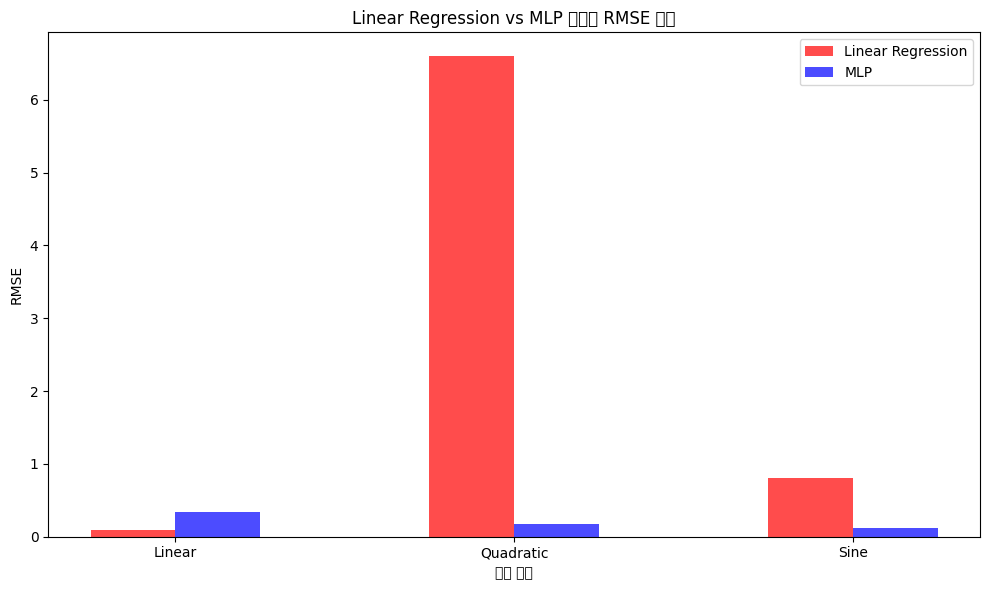

In [37]:
# Display RMSE results
import pandas as pd

# 결과 계산
results = []
for name, y in data.items():
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

    lr.fit(X_train, y_train)
    mlp.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)

    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

    results.append([name, rmse_lr, rmse_mlp])

# 결과 DataFrame 생성
results_df = pd.DataFrame(results, columns=['Function', 'Linear Regression RMSE', 'MLP RMSE'])

# RMSE 차이 계산 (절대값 및 상대적 차이 퍼센트)
results_df['RMSE 차이 (LR - MLP)'] = results_df['Linear Regression RMSE'] - results_df['MLP RMSE']
results_df['RMSE 차이 (절대값)'] = abs(results_df['RMSE 차이 (LR - MLP)'])
results_df['RMSE 차이 (%)'] = (results_df['RMSE 차이 (절대값)'] / results_df['Linear Regression RMSE']) * 100

# 결과 출력
print("선형회귀와 MLP 모델의 RMSE 결과 및 차이:")
print(results_df)
# write me to return value of 적합성 which is 역수 of RMSE

# 차이가 더 큰 함수 확인
max_diff_func = results_df.loc[results_df['RMSE 차이 (절대값)'].idxmax(), 'Function']
print(f"\n가장 큰 차이를 보이는 함수: {max_diff_func}")

# 그래픽으로 RMSE 비교
plt.figure(figsize=(10, 6))
barWidth = 0.25
r1 = np.arange(len(results_df))
r2 = [x + barWidth for x in r1]

plt.bar(r1, results_df['Linear Regression RMSE'], width=barWidth, label='Linear Regression', color='red', alpha=0.7)
plt.bar(r2, results_df['MLP RMSE'], width=barWidth, label='MLP', color='blue', alpha=0.7)

plt.xlabel('함수 유형')
plt.ylabel('RMSE')
plt.title('Linear Regression vs MLP 모델의 RMSE 비교')
plt.xticks([r + barWidth/2 for r in range(len(results_df))], results_df['Function'])
plt.legend()
plt.tight_layout()
plt.show()
